In [2]:
from obspy.core import Stream, read
import numpy as np
from pytensor.compile.ops import as_op
import pytensor
import pytensor.tensor as pt
import matplotlib.pyplot as plt
import pandas as pd
import os 
import os.path
import pymc as pm
import arviz as az

In [3]:
# What exactly are the colunns here? Amplitude of waves at a specific time?
# My equivalent = peak strain at a specific time

# Build the target function, misfit to this is what is being minimized
@as_op(itypes=[pt.dvector,pt.dscalar,pt.dscalar,pt.dscalar,pt.dscalar,pt.dscalar], otypes=[pt.dvector])
def two_straight_lines(x,m1,m2,xinter,x0,y0):
    '''
    input x coordiantes are in x
    slopes are m1 and m2
    intercept of left hand line is b1 
    intersection of two lines is at xinter
    
    Note that y intercept of second straight line is dependent on b1 and xinter
      and defined entirely by them (so that the lines touch).
    '''
    
    # Output vector
    y_out = np.ones(len(x))
    
    # Before building the first straight line, calculate the intercept
    b1 = y0 - m1*x0
    
    # Build first straight line segment
    y_out = m1*x + b1
    
    # Find points that are after the intersection and make the second segment
    i = np.where(x>xinter)[0]
    
    # Define second y intercept
    b2 = m1*xinter + b1 - m2*xinter
    
    # Make second straight line
    y_out[i] = m2*x[i] + b2

    return y_out

# Build the target function, misfit to this is what is being minimized
def non_pytensor_two_straight_lines(x,m1,m2,xinter,x0,y0):
    '''
    input x coordiantes are in x
    slopes are m1 and m2
    intercept of left hand line is b1 
    intersection of two lines is at xinter
    
    Note that y intercept of second straight line is dependent on b1 and xinter
      and defined entirely by them (so that the lines touch).
    '''
    
    # Output vector
    yout = np.ones(len(x))
    
    # Before building the first straight line, calculate the intercept
    b1 = y0 - m1*x0
    
    # Build first straight line segment
    yout = m1*x + b1
    
    # Find points that are after the intersection and make the second segment
    i = np.where(x>xinter)[0]
    
    # Define second y intercept
    b2 = m1*xinter + b1 - m2*xinter
    
    # Make second straight line
    yout[i] = m2*x[i] + b2

    return yout

In [4]:
path = '/Users/sydneydybing/StrainProject/2024/tohoku_strain_data/'
snr_array = pd.read_csv(path + 'stations_hypdists_snrs.list')
snr_array

,Station_name,latitude,longitude,azimuth(S1),azimuth(S2),azimuth(S3),azimuth(S4),hyp_dist_km,rms_snr
0,KST1,33.5201,135.8363,310,40,85,175,792.746765,1.273396
1,HGM1,33.8675,135.7318,337,67,112,202,773.809644,1.139778
2,ICU1,33.9001,136.1379,141,231,276,6,743.491829,1.203692
3,ANO1,34.7870,136.4019,38,128,173,263,661.251185,1.113420
4,SSK1,33.3896,133.3229,355,85,130,220,981.546244,1.285971
5,UWA1,33.3859,132.4823,222,312,357,87,1045.683453,1.282839
6,MUR1,33.2856,134.1563,147,237,282,12,927.200827,1.258307
7,MYM1,34.1123,136.1815,237,327,12,102,724.694237,1.134499


Processing KST1


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


/Users/sydneydybing/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),


Sampling 4 chains for 3_000 tune and 15_000 draw iterations (12_000 + 60_000 draws total) took 1568 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


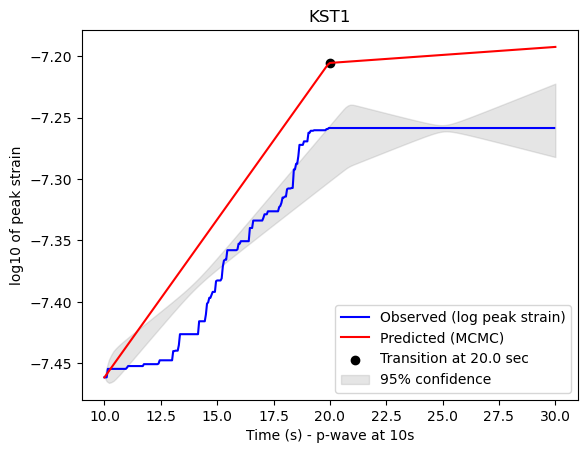

KST1 done
Processing HGM1


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


/Users/sydneydybing/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),


Sampling 4 chains for 3_000 tune and 15_000 draw iterations (12_000 + 60_000 draws total) took 120 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


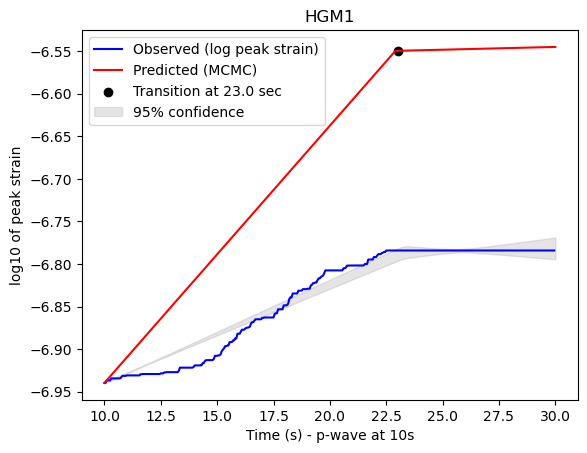

HGM1 done
Processing ICU1


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


/Users/sydneydybing/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),


Sampling 4 chains for 3_000 tune and 15_000 draw iterations (12_000 + 60_000 draws total) took 110 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


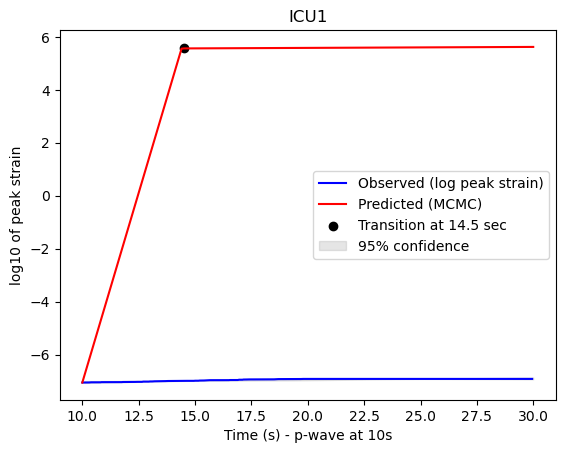

ICU1 done
Processing ANO1


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


/Users/sydneydybing/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),


Sampling 4 chains for 3_000 tune and 15_000 draw iterations (12_000 + 60_000 draws total) took 96 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


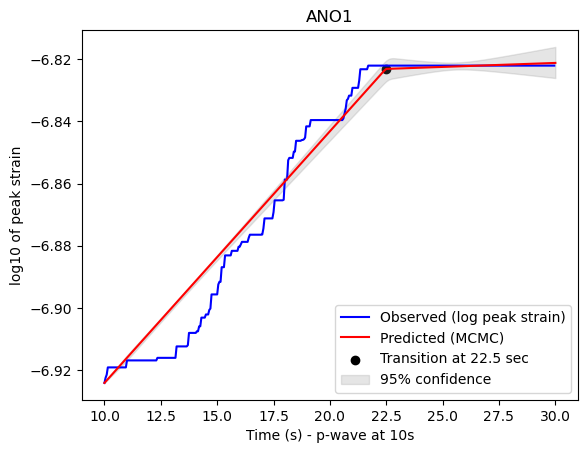

ANO1 done
Processing SSK1


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


/Users/sydneydybing/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),


Sampling 4 chains for 3_000 tune and 15_000 draw iterations (12_000 + 60_000 draws total) took 100 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


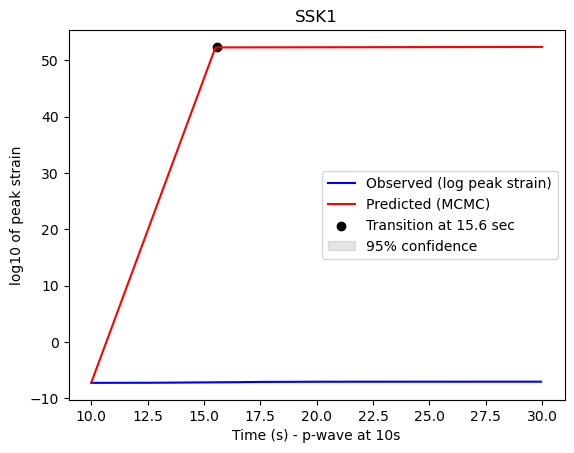

SSK1 done
Processing UWA1


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


/Users/sydneydybing/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),


Sampling 4 chains for 3_000 tune and 15_000 draw iterations (12_000 + 60_000 draws total) took 97 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


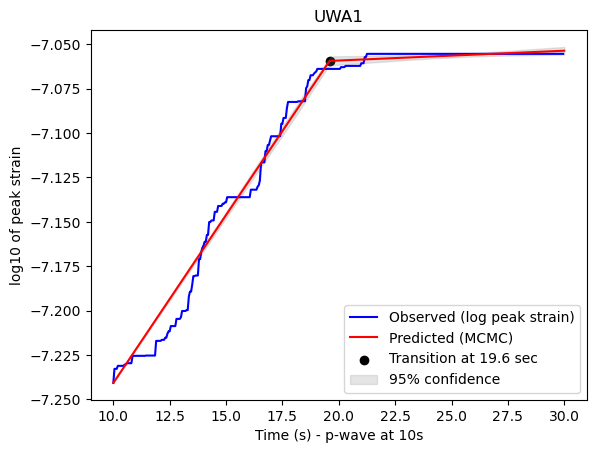

UWA1 done
Processing MUR1


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


/Users/sydneydybing/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),


Sampling 4 chains for 3_000 tune and 15_000 draw iterations (12_000 + 60_000 draws total) took 96 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


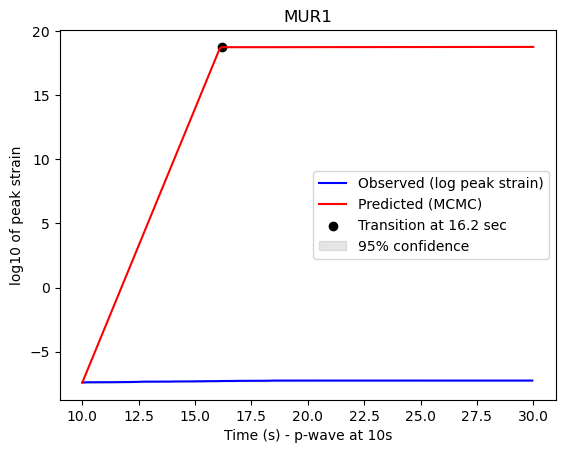

MUR1 done
Processing MYM1


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


/Users/sydneydybing/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),


Sampling 4 chains for 3_000 tune and 15_000 draw iterations (12_000 + 60_000 draws total) took 95 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


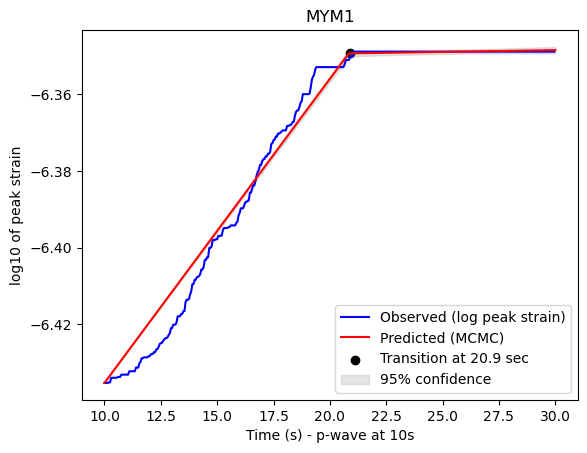

MYM1 done


In [11]:
stas_list = []
hypdist_list = []
xhighs_list = []
m1s_list = []
m2s_list = []
xinters_list = []
sigmas_list = []
trans_time_list = []

counter = 0

for i in range(len(snr_array)):
    
    sta = snr_array['Station_name'][i]
    hypdist = float(snr_array['hyp_dist_km'][i])
    int_hypdist = int(hypdist)
    snr = float(snr_array['rms_snr'][i])
    
    # print(eq_id, sta)

    # Figure out the bounds for the MCMC based on the event and hypocentral distance (rainbow plots)

    xhigh = 30 # For Tohoku, based on plot in code #5
        
    pst = read(path + 'filtered_peak_post_p/' + str(sta) + '.mseed')
    counter += 1
    # print(counter)
    # pst.plot()
    # plt.plot(pst[0].times(), pst[0].data)
    # plt.semilogy()

    print('Processing ' + str(sta))

    times = pst[0].times()
    data = pst[0].data
    log10_data = np.log10(data)
    samp_rate = pst[0].stats.sampling_rate

#         print(times)
#         print(data)

#         plt.plot(times, data)

    xlow = 10

    # print('MCMC bounds:')
    # print(xlow, xhigh)

    vec_start = int(xlow*samp_rate)
    vec_end = int(xhigh*samp_rate)

    # Split into x and y vectors
    xobserved = times[vec_start:vec_end]
    # print(xobserved.shape)

    yobserved = log10_data[vec_start:vec_end]
    # print(yobserved.shape)

    # plt.plot(xobserved, yobserved)

    x0 = xobserved[0]
    y0 = yobserved[0]

    # in order to pass the x variable into the target function it needs to be 
    # converted to a Theano "shared" variable
    pt_xobserved = pytensor.shared(xobserved)
    pt_x0 = pytensor.shared(x0)
    pt_y0 = pytensor.shared(y0)

    # MCMC run parameters, these are good numbers for a "production" run. If you are
    # fooling arund these can be lower to iterate faster
    Nburn = 3000 # burn in samples that get discarded
    Nmcmc = 15000 # bump to at least 5-10k - increase this after ficing the uniform part 
    Nchains = 4
    Ncores = 1

    # Bounds for the prior distributions - expect this, but not enforce
    m1_low = 0 ; m1_high = 100 # lowest slope 0, highest 10
    m2_low = 0 ; m2_high = 100
    # b1_low = -50 ; b1_high = 0 # lowest y-intercept -20, highest 0
    xinter_low = 10 ; xinter_high = 25 # location of the line slope change

    # Define the Bayesian model
    with pm.Model()as model:

        # Use normal distributions as priors
        # m1 = pm.Normal('m1', mu=0.5, sigma=1) # change mu (mean), could also make uniform (pm.uniform) for random sampling. Uninformative prior
        # m2 = pm.Normal('m2', mu=-0.1,sigma=5)
        m1 = pm.Uniform('m1', lower = m1_low, upper = m1_high) # change mu (mean), could also make uniform (pm.uniform) for random sampling. Uninformative prior
        m2 = pm.Uniform('m2', lower = m2_low, upper = m2_high)
        # b1 = pm.Normal('b1', mu=-5, sigma=5)
        xinter = pm.Uniform('xinter', lower = xinter_low, upper = xinter_high)
        sigma = pm.HalfCauchy('sigma', beta = 10, initval = 1.)

        # This is the model
        likelihood = pm.Normal('y', mu = two_straight_lines(pt_xobserved,m1,m2,xinter,pt_x0,pt_y0),
                                observed = yobserved, sigma = sigma)
    #    likelihood = pm.Normal('y', mu=one_straight_line(xobserved,m1,b1),observed=yobserved,
    #                           sigma=sigma)

        # NUTS sampler (default) is gradient based and won't work, use metropolis
        step = pm.Metropolis() # Check out Diego's book - condition for accepting new sample as "better" than last

        # This runs the mcmc sampler
        mcmc = pm.sample(Nmcmc, tune = Nburn, chains = Nchains, cores = Ncores, step = step)

    # Done, now is post-processing to get the data out of the sampler

    posterior = az.extract(mcmc)

    # Unwrap coeficients - WRITE LINES TO SAVE THE ARRAYS!!!
    m1_array = posterior.m1.values
    m1 = np.mean(m1_array)
    # print('m1 mean: ' + str(round(m1,2)))

    m2_array = posterior.m2.values
    m2 = np.mean(m2_array)
    # print('m2 mean: ' + str(round(m2,2)))

    xinter_array = posterior.xinter.values
    xinter = np.mean(xinter_array)
    # print('xinter Mean: ' + str(round(xinter,2)))

    sigma_array = posterior.sigma.values
    sigma = np.mean(sigma_array)

    # Lines!
    b1 = y0 - m1*x0
    b2 = m1*xinter + b1 - m2*xinter

    # Make plot to check stuff
    xpredicted = np.arange(xobserved.min(), xobserved.max()+0.1, 0.1)
    # ypredicted = np.ones(len(xpredicted))
    ypredicted = m1*xpredicted + b1
    i = np.where(xpredicted > xinter)[0]
    ypredicted[i] = m2*xpredicted[i] + b2

    # Get one-sigma region (need to obtain a ton of forward models and get stats)
    N = len(posterior.m1.values)

    yfit = np.zeros((len(xpredicted), N))
    for k in range(N):
        yfit[:,k] = non_pytensor_two_straight_lines(xpredicted,m1_array[k],m2_array[k],xinter_array[k],x0,y0)
    mu = yfit.mean(1)
    sig = yfit.std(1) * 1.95 #for 95% confidence
    mu_plus = mu + sig
    mu_minus = mu - sig

    # Least squares
    mls, bls = np.polyfit(xobserved, yobserved, 1)

    # Find the transition point in ypredicted
    diff = np.round(np.diff(ypredicted), decimals = 5)
    # print(diff)
    first_slope = diff[0]
    second_slope = diff[-1]
    trans_idx = np.where((diff != first_slope) & (diff != second_slope))[0][0] + 1

    # Get the transition point
    mcmc_trans_x = xpredicted[trans_idx] # Number
    mcmc_trans_y = ypredicted[trans_idx]

    # Append things
    stas_list.append(sta)
    hypdist_list.append(int_hypdist)
    xhighs_list.append(xhigh)
    m1s_list.append(m1)
    m2s_list.append(m2)
    xinters_list.append(xinter)
    sigmas_list.append(sigma)
    trans_time_list.append(mcmc_trans_x)

    # Plot all solutions
    fig = plt.figure(dpi = 100)
    ax = fig.add_subplot(111)
    ax.set_title(str(sta))

    ax.plot(xobserved, yobserved, color = 'blue', label = 'Observed (log peak strain)')
    ax.plot(xpredicted, ypredicted, color = 'red', label = 'Predicted (MCMC)')
    # ax.plot(xpredicted, mu, color = 'green', linestyle = '--', label = 'yfit')
    # ax.plot(xpredicted, xpredicted * mls + bls, color = 'orange', label = 'np.polyfit least squares')
    ax.scatter(xpredicted[trans_idx], ypredicted[trans_idx], marker = 'o', color = 'black', label = 'Transition at ' + str(round(xpredicted[trans_idx],2)) + ' sec')
    # ax.scatter(closest_trans_x, closest_trans_y, marker = 'o', color = 'green', label = 'Adjusted transition at ' + str(round(closest_trans_x,2)) + ' sec')
    # ax2 = ax.twinx()
    # ax2.plot(xobserved, pythags_arr, color = 'violet')
    # ax2.axhline(closest_trans_x, color = 'violet', linestyle = '--')
    ax.fill_between(xpredicted, mu_plus, mu_minus, color = 'gray', alpha = 0.2, label = '95% confidence') # 95% confidence interval
    ax.set_xlabel('Time (s) - p-wave at 10s')
    ax.set_ylabel('log10 of peak strain')
    # ax.set_xlim(10,13)
    ax.legend()

    plt.show()

    # Create folder for the event
    array_save_dir = path + 'filtered_mcmc_arrays/' + str(sta) + '/'
    if os.path.isdir(array_save_dir):
        pass
    else:
        os.makedirs(array_save_dir)

    # Save arrays
    np.save(array_save_dir + 'xobserved.npy', xobserved)
    np.save(array_save_dir + 'yobserved.npy', yobserved)
    np.save(array_save_dir + 'xpredicted.npy', xpredicted)
    np.save(array_save_dir + 'ypredicted.npy', ypredicted)
    np.save(array_save_dir + 'forward_mus.npy', mu)
    np.save(array_save_dir + 'foward_sigs.npy', sig)

    # Save posterior
    summary = az.summary(mcmc)
    summary.to_csv(array_save_dir + 'summary.csv')
    # posterior = az.extract(mcmc)
    # posterior.to_netcdf(path = array_save_dir + 'posterior.nc', mode = 'w') # Doesn't work right now

    # Save figure
    fig_save_dir = path + 'figures/filtered_mcmc_plots/'
    if os.path.isdir(fig_save_dir):
        pass
    else:
        os.makedirs(fig_save_dir)

    plt.savefig(fig_save_dir + sta + '.png', format = 'PNG', dpi = 400)
    plt.close()

    print(str(sta) + ' done')

In [ ]:
counter

In [ ]:
mcmc_array = np.column_stack((np.array(events_list), np.array(mags_list), np.array(stas_list), np.array(hypdist_list),
                             np.array(xhighs_list), np.array(m1s_list), np.array(m2s_list), np.array(xinters_list),
                             np.array(sigmas_list), np.round(np.array(trans_time_list),2)))

np.save(path_to_files + 'filtered_mcmc_arrays/summary_array.npy', mcmc_array)

In [ ]:
mcmc_array.shape

In [ ]:
mcmc_array = np.load(path_to_files + 'filtered_mcmc_arrays/summary_array.npy')
mcmc_array[0]

# Columns:
# 0. Event name
# 1. Magnitude
# 2. Station name
# 3. Hypocentral distance (km)
# 4. xhigh
# 5. m1 slope
# 6. m2 slope
# 7. intersection point
# 8. sigma
# 9. transition time

In [ ]:
# Calculate earthquake source durations

# Get M0 from Mw, then use relation in Melgar and Hayes, 2017 to get duration

mags_for_relation = np.arange(6,7.25,0.05)
# print(mags_for_dur)

# Preferred params for source duration
apref_sd = -6.407
bpref_sd = 0.385

apref_rt = -5.323
bpref_rt = 0.293

source_durs = []
rise_times = []

for Mw in mags_for_relation:
    
    M0 = 10**(1.5*Mw + 9.05)
    # print(M0)
    
    log_sd = apref_sd + bpref_sd * np.log10(M0)
    source_dur = 10**log_sd
    source_durs.append(source_dur)
    
    log_rt = apref_rt + bpref_rt * np.log10(M0)
    rise_time = 10**log_rt
    rise_times.append(rise_time)
    

In [ ]:
# Get mean transition time by event

unique_eventids = np.unique(mcmc_array[:,0])
unique_eventids

mags = []
mean_trans_times = []

for uni_id in unique_eventids:
    
    print(uni_id)
    i = np.where(uni_id == mcmc_array[:,0])[0]
    # print(i)
    
    trans_times = mcmc_array[i,9].astype(float)-10
    mag = mcmc_array[i,1].astype(float)[0]
    # print(mags)
    print(trans_times)
    
    mean_trans_time = np.mean(trans_times)
    # print(mean_trans_time)
    
    mags.append(mag)
    mean_trans_times.append(mean_trans_time)
    
mags = np.array(mags)
mean_trans_times = np.array(mean_trans_times)

In [ ]:
m, b = np.polyfit(mags, np.log10(mean_trans_times), 1)
ma, ba = np.polyfit(mcmc_array[:,1].astype(float), np.log10(mcmc_array[:,9].astype(float)-10), 1)

In [ ]:
# plt.scatter(mcmc_array[:,3].astype(float), mcmc_array[:,9].astype(float)-10)
# plt.xlabel('Hypocentral distance (km)')
# plt.ylabel('Transition time (s)')
# plt.show()



plt.scatter(mcmc_array[:,1].astype(float), np.log10(mcmc_array[:,9].astype(float)-10))
plt.scatter(mags, np.log10(mean_trans_times), marker = '+', color = 'red', label = 'Mean transition time by event')
plt.plot(mags, mags * m + b, color = 'red', lw = 1)
plt.plot(mcmc_array[:,1].astype(float), mcmc_array[:,1].astype(float) * ma + ba, color = 'C0', lw = 1)
plt.plot(mags_for_relation, np.log10(source_durs), color = 'lime', label = 'Source duration scaling')
plt.plot(mags_for_relation, np.log10(rise_times), color = 'turquoise', label = 'Rise time scaling')
plt.xlabel('Earthquake magnitude')
plt.ylabel('Log10 of transition time (s)')
# plt.semilogy()
plt.legend()
plt.show()

plt.scatter(mcmc_array[:,1].astype(float), mcmc_array[:,5].astype(float))
plt.xlabel('Earthquake magnitude')
plt.ylabel('Line 1 slope')
plt.show()

plt.scatter(mcmc_array[:,1].astype(float), mcmc_array[:,6].astype(float))
plt.xlabel('Earthquake magnitude')
plt.ylabel('Line 2 slope')
plt.show()

In [ ]:
# mcmc_array = np.column_stack((np.array(events_list), np.array(mags_list), np.array(stas_list), np.array(hypdist_list),
#                              np.array(xhighs_list), np.array(m1s_list), np.array(m2s_list), np.array(xinters_list),
#                              np.array(sigmas_list), np.array(trans_time_list)))

pd_mcmc = pd.DataFrame(mcmc_array, columns = ['eq_id', 'mag', 'sta', 'hypdist', 'xhigh', 'm1', 'm2', 'xinter', 'sigma', 'trans_time'])
pd_mcmc.to_csv(path_to_files + 'filtered_mcmc_arrays/mcmc_results_summary.csv', index = False)

In [ ]:
# Figure out the "good" and "bad" performing waveforms using an L2 norm

mcmc_results = pd.read_csv(path_to_files + 'filtered_mcmc_arrays/mcmc_results_summary.csv')
mcmc_results

,eq_id,mag,sta,hypdist,xhigh,m1,m2,xinter,sigma,trans_time
0,2023-04-13_M6,6.0,B012,299,60,0.237385,0.014034,13.037766,0.106723,13.1
1,2023-04-13_M6,6.0,B927,349,60,0.520998,0.006502,13.746085,0.151608,13.8
2,2023-04-13_M6,6.0,B928,330,60,0.473223,0.010361,12.366934,0.085590,12.4
3,2022-12-20_M6.4,6.4,B030,406,40,0.169725,0.031976,13.733588,0.111113,13.8
4,2022-12-20_M6.4,6.4,B032,359,40,0.143660,0.033170,14.465866,0.101163,14.5
...,...,...,...,...,...,...,...,...,...,...
195,2010-01-10_M6.5,6.5,B035,232,35,0.519965,0.025339,13.499214,0.170624,13.5
196,2010-01-10_M6.5,6.5,B036,233,35,0.515825,0.026782,13.503401,0.170778,13.6
197,2010-01-10_M6.5,6.5,B057,344,35,0.123378,0.020024,15.241258,0.067794,15.3
198,2010-01-10_M6.5,6.5,B933,89,35,0.740438,0.048036,13.192635,0.155758,13.2


In [31]:
# mcmc_results_class_by_eye = pd.read_csv(path_to_files + 'mcmc_results_summary.csv', usecols = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
# mcmc_results_class_by_eye

,eq_id,mag,sta,hypdist,xhigh,m1,m2,xinter,sigma,trans_time,behavior
0,2023-04-13_M6,6.0,B003,423,60,0.276567,0.012251,14.075615,0.141517,14.1,b
1,2023-04-13_M6,6.0,B004,398,60,0.523278,0.010967,12.877702,0.101206,12.9,g
2,2023-04-13_M6,6.0,B005,468,60,0.392836,0.009337,12.057298,0.075473,12.1,g
3,2023-04-13_M6,6.0,B009,456,60,0.428682,0.000518,12.471551,0.079256,12.5,g
4,2023-04-13_M6,6.0,B012,299,60,0.420404,0.013704,13.220529,0.112984,13.3,g
...,...,...,...,...,...,...,...,...,...,...,...
321,2010-01-10_M6.5,6.5,B066,499,35,0.228458,0.026041,15.608228,0.096790,15.7,g
322,2010-01-10_M6.5,6.5,B933,89,35,1.205989,0.046212,12.710480,0.220511,12.8,g
323,2010-01-10_M6.5,6.5,B934,123,35,0.258354,0.063122,12.957077,0.087686,13.0,b
324,2010-01-10_M6.5,6.5,B935,96,35,1.338175,0.021897,12.540953,0.210012,12.6,g


In [41]:
# good_results = mcmc_results_class_by_eye[mcmc_results_class_by_eye['behavior'] == 'g']
# bad_results = mcmc_results_class_by_eye[mcmc_results_class_by_eye['behavior'] == 'b']
# good_results

,eq_id,mag,sta,hypdist,xhigh,m1,m2,xinter,sigma,trans_time,behavior
1,2023-04-13_M6,6.0,B004,398,60,0.523278,0.010967,12.877702,0.101206,12.9,g
2,2023-04-13_M6,6.0,B005,468,60,0.392836,0.009337,12.057298,0.075473,12.1,g
3,2023-04-13_M6,6.0,B009,456,60,0.428682,0.000518,12.471551,0.079256,12.5,g
4,2023-04-13_M6,6.0,B012,299,60,0.420404,0.013704,13.220529,0.112984,13.3,g
5,2023-04-13_M6,6.0,B927,349,60,0.644048,0.006067,12.064490,0.108054,12.1,g
...,...,...,...,...,...,...,...,...,...,...,...
319,2010-01-10_M6.5,6.5,B054,377,35,0.474619,0.001973,13.653904,0.078392,13.7,g
320,2010-01-10_M6.5,6.5,B057,344,35,0.379983,0.023154,14.384422,0.117667,14.4,g
321,2010-01-10_M6.5,6.5,B066,499,35,0.228458,0.026041,15.608228,0.096790,15.7,g
322,2010-01-10_M6.5,6.5,B933,89,35,1.205989,0.046212,12.710480,0.220511,12.8,g


In [51]:
# plt.figure(dpi = 400)
# plt.scatter(bad_results.hypdist.values, bad_results.xinter.values, marker = 'x', color = '#E9072B', label = '"Poorly-behaved" waveforms')
# plt.scatter(good_results.hypdist.values, good_results.xinter.values, marker = 'o', color = '#355464', alpha = 0.6, label = '"Well-behaved" waveforms')
# plt.xlabel('Hypocentral distance (km)')
# plt.ylabel('Transition time (s)')
# plt.legend()
# # plt.show()
# plt.savefig(path_to_files + 'figures/filtered_mcmc_plots/summary_hypdist_vs_transtime.png', format = 'PNG')
# plt.close()

# plt.figure(dpi = 400)
# plt.scatter(bad_results.mag.values, bad_results.xinter.values, marker = 'x', color = '#E9072B', label = '"Poorly-behaved" waveforms')
# plt.scatter(good_results.mag.values, good_results.xinter.values, marker = 'o', color = '#355464', alpha = 0.6, label = '"Well-behaved" waveforms')
# plt.xlabel('Earthquake magnitude')
# plt.ylabel('Transition time (s)')
# plt.legend()
# # plt.show()
# plt.savefig(path_to_files + 'figures/filtered_mcmc_plots/summary_mag_vs_transtime.png', format = 'PNG')
# plt.close()

# plt.figure(dpi = 400)
# plt.scatter(bad_results.mag.values, bad_results.m1.values, marker = 'x', color = '#E9072B', label = '"Poorly-behaved" waveforms')
# plt.scatter(good_results.mag.values, good_results.m1.values, marker = 'o', color = '#355464', alpha = 0.6, label = '"Well-behaved" waveforms')
# plt.xlabel('Earthquake magnitude')
# plt.ylabel('Line 1 slope')
# plt.legend()
# # plt.show()
# plt.savefig(path_to_files + 'figures/filtered_mcmc_plots/summary_mag_vs_m1.png', format = 'PNG')
# plt.close()

# plt.figure(dpi = 400)
# plt.scatter(bad_results.mag.values, bad_results.m2.values, marker = 'x', color = '#E9072B', label = '"Poorly-behaved" waveforms')
# plt.scatter(good_results.mag.values, good_results.m2.values, marker = 'o', color = '#355464', alpha = 0.6, label = '"Well-behaved" waveforms')
# plt.xlabel('Earthquake magnitude')
# plt.ylabel('Line 2 slope')
# plt.legend()
# # plt.show()
# plt.savefig(path_to_files + 'figures/filtered_mcmc_plots/summary_mag_vs_m2.png', format = 'PNG')
# plt.close()

In [93]:
summary = az.summary(mcmc)

In [94]:
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
m1,1.608,0.390,1.130,2.124,0.274,0.231,2.0,11.0,2.84
m2,0.013,0.003,0.011,0.019,0.002,0.001,3.0,21.0,2.24
xinter,11.131,0.335,10.699,11.574,0.235,0.198,2.0,10.0,2.69
sigma,0.106,0.037,0.067,0.177,0.024,0.020,2.0,13.0,2.32


In [77]:
summary['mean']

m1         0.302
m2         0.039
xinter    12.971
sigma      0.163
Name: mean, dtype: float64

In [82]:
m1 = summary['mean'].iloc[0]
m2 = summary['mean'].iloc[1]
xinter = summary['mean'].iloc[2]
sigma = summary['mean'].iloc[3]

In [85]:
print(sigma)

0.163


In [87]:
# Done, now is post-processing to get the data out of the sampler

summary = az.summary(mcmc)

# Unwrap coeficients
m1 = summary['mean'].iloc[0]
m2 = summary['mean'].iloc[1]
xinter = summary['mean'].iloc[2]
sigma = summary['mean'].iloc[3]
b1 = y0 - m1*x0
b2 = m1*xinter + b1 - m2*xinter

In [88]:
# Make plot to check stuff
xpredicted = np.arange(xobserved.min(), xobserved.max()+0.1, 0.1)
ypredicted = np.ones(len(xpredicted))
ypredicted = m1*xpredicted + b1
i = np.where(xpredicted > xinter)[0]
ypredicted[i] = m2*xpredicted[i] + b2

In [90]:
posterior = az.extract(mcmc)

In [95]:
posterior

<xarray.Dataset> Size: 224kB
Dimensions:  (sample: 4000)
Coordinates:
  * sample   (sample) object 32kB MultiIndex
  * chain    (sample) int64 32kB 0 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1 1 1
  * draw     (sample) int64 32kB 0 1 2 3 4 5 6 ... 1994 1995 1996 1997 1998 1999
Data variables:
    m1       (sample) float64 32kB 0.2794 0.2794 0.2794 ... 0.3114 0.3114 0.3114
    m2       (sample) float64 32kB 0.0466 0.0466 0.0466 ... 0.04077 0.04077
    xinter   (sample) float64 32kB 12.98 12.98 12.99 12.99 ... 12.95 12.94 12.94
    sigma    (sample) float64 32kB 0.1522 0.1522 0.1522 ... 0.1575 0.1575 0.1575
Attributes:
    created_at:                 2024-03-05T10:45:23.481163
    arviz_version:              0.17.0
    inference_library:          pymc
    inference_library_version:  5.10.4
    sampling_time:              8.208245038986206
    tuning_steps:               1000

In [99]:
len(posterior.m1.values)

4000